In [2]:
import sys, os
sys.path.append(os.path.join('..', 'scripts'))
sys.path.append(os.path.join('..', 'scripts/llp_bouncing'))
import figure_utils as utils
import lif_utils
import predict_llp

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pandas as pd
import pytry
import os.path

import glob

In [17]:
time, env, pred_x, pred_y = predict_llp.run_trial(q=10,theta=0.5,pred_steps=10,duration=400)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [66]:
np.arange(1,500,10)

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491])

In [69]:
dt=1e-3
window=int(0.5/dt)
num_steps = env.shape[0]

real_xs = env[:,0]
real_ys = env[:,1]
errors = np.zeros((num_steps - window,))

def rmse(xs):
    return np.sqrt(np.mean(np.power(xs,2)))

def smooth(x, window_len):
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    w=np.ones(window_len,'d')

    return np.convolve(w/w.sum(),s,mode='valid')
### end smooth


for t in range(num_steps - window):
    idxs = np.arange(t,t+window,window//pred_x.shape[1])
    errors[t] = rmse(np.array([env[idxs,0] - pred_x[t,:], env[idxs,1] - pred_y[t,:]]))
### end for

smoothed_errors = smooth(errors, int(2 * window))
max_time = min(time.shape[0], smoothed_errors.shape[0])

Saving to llp_ball_prediction_figure.large.pdf
Extracting bounding box of file llp_ball_prediction_figure.large.pdf
Optimising PDF and saving to llp_ball_prediction_figure.pdf


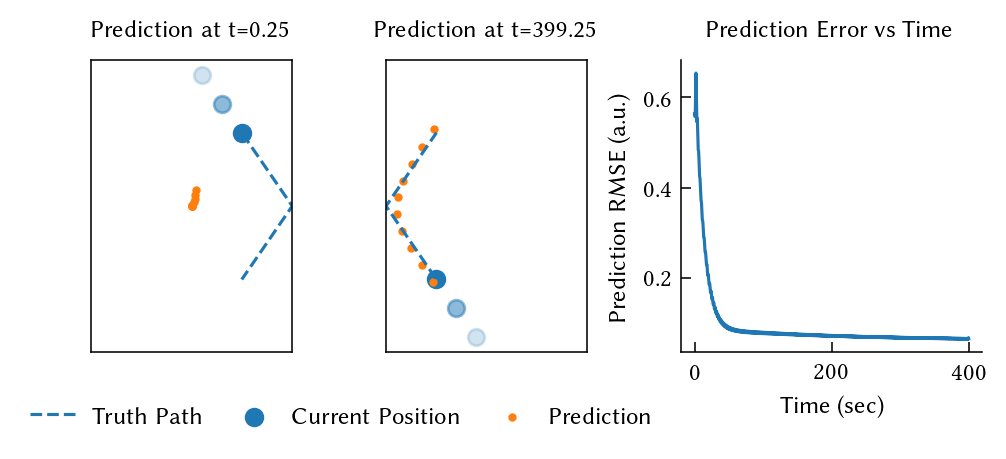

In [136]:
early_idx=250
late_idx=-750

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,
                            figsize=(5.75, 1.9),
                            gridspec_kw={
                                "wspace": 0.4,
                                "width_ratios": [1, 1, 1.5]
                            }
                            )


max_steps = 50 * 1000    
line_styles = {0:'solid', 1:'dashed', 2:'dotted', 3:'dashdot'}
# Figure 1.a - Early Predictions

ax1.plot(env[early_idx:early_idx+window,0], env[early_idx:early_idx+window,1], c='tab:blue', ls='--', label='Truth Path')
ax1.scatter(env[early_idx,0], env[early_idx,1],c='tab:blue', label='Current Position')
ax1.scatter(env[early_idx-100,0], env[early_idx-100,1], c='tab:blue', alpha=0.5)
ax1.scatter(env[early_idx-200,0], env[early_idx-200,1], c='tab:blue', alpha=0.2)

ax1.scatter(pred_x[early_idx,:], pred_y[early_idx,:], s=4, c='tab:orange', label='Prediction')

        
#ax1.set_ylabel('$f(t)$ (a.u.)')
#ax1.set_xlabel('Sample Number ($n$)')
ax1.set_xticks([])
ax1.set_xlim(-1,1)

ax1.set_yticks([])
ax1.set_ylim(-1,1)
ax1.spines['right'].set_visible(True)
ax1.spines['top'].set_visible(True)
#ax1.set_title(f'Average Regret')

ax1.legend(loc="upper center", ncol=3, bbox_to_anchor=(1.25, -0.1), columnspacing=1.0, handlelength=2, handletextpad=0.5)
ax1.set_title(f'Prediction at t={early_idx*dt}', x=0.5, y=1., va="bottom")


### Figure 2 -- Late predictions

#ax2.plot(time[:max_steps], mean_se[:max_steps] / np.mean(target_vals), label='Prediction Error', ls=line_styles[0])

#ax2.scatter(env[late_idx,0], env[late_idx,1])
ax2.scatter(env[late_idx,0], env[late_idx,1],c='tab:blue')
ax2.scatter(env[late_idx-100,0], env[late_idx-100,1], c='tab:blue', alpha=0.5)
ax2.scatter(env[late_idx-200,0], env[late_idx-200,1], c='tab:blue', alpha=0.2)
ax2.plot(env[late_idx:late_idx+window,0], env[late_idx:late_idx+window,1], ls='--', label='Ground Truth')
ax2.scatter(pred_x[late_idx,:], pred_y[late_idx,:], s=4, c='tab:orange', label='Prediction')

ax2.set_xticks([])
ax2.set_xlim(-1,1)

ax2.set_yticks([])
ax2.set_ylim(-1,1)

ax2.spines['right'].set_visible(True)
ax2.spines['top'].set_visible(True)

num_steps = env.shape[0]
#ax2.legend(loc="upper center", ncol=1, bbox_to_anchor=(0.5, 1.1), columnspacing=1.0, handlelength=2, handletextpad=0.5)
ax2.set_title(f'Prediction at t={(num_steps+late_idx)*dt}', x=0.5, y=1., va="bottom")


### Figure 3 -- Reduction

ax3.plot(time[:max_time], smoothed_errors[:max_time])
ax3.set_xlabel('Time (sec)')
ax3.set_ylabel('Prediction RMSE (a.u.)')
ax3.set_title('Prediction Error vs Time', x=0.5, y=1., va="bottom")

            
utils.save(fig, "llp_ball_prediction_figure.pdf")